In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd


csv_file_path = '/content/gdrive/MyDrive/Phishing detection Minor Project /Final datasets/nazario_emails.csv'
df_phishing = pd.read_csv(csv_file_path, encoding='cp1252')

csv_file_path = '/content/gdrive/MyDrive/Phishing detection Minor Project /Final datasets/legal_emails.csv'
df_legal = pd.read_csv(csv_file_path, encoding='cp1252')

In [6]:
# Adding an extra column to df_legal with value 0
df_legal['Label'] = 0

# Adding an extra column to df_phishing with value 1
df_phishing['Label'] = 1

# Concatenating the datasets and shuffling rows randomly (if needed)
df_combined = pd.concat([df_legal, df_phishing]).sample(frac=1).reset_index(drop=True)

df=df_combined

df = df.drop('From', axis=1)
df = df.drop('ï»¿From', axis=1)
#df = df.drop('URL', axis=1)
df = df.drop('Date', axis=1)
df = df.drop('Time', axis=1)
df = df.drop('To', axis=1)
column_names = df.columns.tolist()
df.head()

,Subject,URL,Body,Label
0,Re: Programming for RDI Model,NaN,\tchris.constantine@enron.com\r\rMime-Version:...,0
1,Urgent Request ID892792,"http://www.w3.org/TR/REC-html40"">",\r\r\r\r\r\r\rRegions Bank\r\r\r\r\r\r\r\r\r\r...,1
2,Private Message From eBay Accounts Management !!!,http://pics.ebay.com/aw/pics/homepage/v2/logo_...,\r\r\r\r \rDear valued eBay member: \r\rW...,1
3,Revised counterparty list,NaN,"Tana,\r\r\r\rAttached is the new list with ""co...",0
4,PayPal Account Suspension Notice - PayPal Acco...,"http://www.paypal.com""><img",\r\r\r\r \r\r\r\r\r\r\r\r\r\r\r\r\r\r\rDear va...,1


**PRE PROCESS: CONVERT TO LOWER CASE AND REMOVE SPECIAL CHARACTER**

In [7]:
import re

def preprocess_text(text):
    # Check if text is a string
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()

        # Remove special characters and digits
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove characters starting with \
        text = re.sub(r'\\[\w\s]+', '', text)

    return text

# Convert non-string values in 'Body' and 'Subject' columns to strings
df['Body'] = df['Body'].astype(str)
df['Subject'] = df['Subject'].astype(str)

# Apply the preprocess_text function to the 'Body' and 'Subject' columns of the DataFrame
df['Body'] = df['Body'].apply(preprocess_text)
df['Subject'] = df['Subject'].apply(preprocess_text)


In [ ]:
df

,Subject,URL,Body,Label
0,notification of limited account access,"http://www.paypal.com/cgi-bin/webscr?cmd=_home"">",\r\r\r \r \rdear valued paypal member \r\r\rpa...,1
1,ebay inc important notification,"http://203.172.247.19/.cgi-bin/.eBay/""><FONT",\r\r\r\rdear ebay member \rwe at ebay are sorr...,1
2,fifth third bank notification,http://www.53.com.bankingportal.id457120694499...,\r\r\r\r\r\rhe would know the real stuff when ...,1
3,special announce tue apr,http://businessbanking.53.com.session806007.my...,\r\r\r\r\r\rdear fifth third bank ...,1
4,re eol credit gcp responses,NaN,tana\r\r\r\rpactiv corporation is not approved...,0
...,...,...,...,...
1621,ebay inc urgent security notification for clie...,https://signin.ebay.com/ws/eBayISAPI.dll?SignI...,wed like to see in i am playboy simpsons,1
1622,nan,NaN,\tbernicerodriguezenroncom billhareenroncom \r...,0
1623,online form released messid,http://cib-id-30433.bankofthewest.com.eportid....,\r\r\r\r\rdear bank of the west clien...,1
1624,security management,"http://www.hofepride.com/securityMeasures/"">Re...",\r\r\r\r\r\t\r\t\t\r\t\t\r\t\t\t\r\t\t\t\t\r\t...,1


**READABILITY BASED FEATURES**

In [8]:
pip install textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 90.3 MB/s eta 0:00:00


In [9]:

import textstat

# create a DataFrame to store the readability features
df_readability = pd.DataFrame()

# iterate over each email in the dataset
for index, row in df.iterrows():
    # calculate the readability scores using the textstat library
    scores = [
        textstat.flesch_reading_ease(str(row['Subject'])),  # use str() to convert to string
        textstat.smog_index(str(row['Subject'])),
        textstat.flesch_kincaid_grade(str(row['Subject'])),
        textstat.coleman_liau_index(str(row['Subject'])),
        textstat.automated_readability_index(str(row['Subject'])),
        textstat.dale_chall_readability_score(str(row['Subject'])),
        textstat.difficult_words(str(row['Subject'])),
        textstat.linsear_write_formula(str(row['Subject']))
    ]
    # add the scores to the DataFrame
    df_readability = df_readability.append(pd.Series(scores), ignore_index=True)

# rename the columns of the DataFrame
df_readability.columns = [
    'flesch_reading_ease',
    'smog_index',
    'flesch_kincaid_grade',
    'coleman_liau_index',
    'automated_readability_index',
    'dale_chall_readability_score',
    'difficult_words',
    'linsear_write_formula'
]

# add the readability features to the original DataFrame
df = pd.concat([df, df_readability], axis=1)



<ipython-input-9-80d2e366f57b>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_readability = df_readability.append(pd.Series(scores), ignore_index=True)
<ipython-input-9-80d2e366f57b>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_readability = df_readability.append(pd.Series(scores), ignore_index=True)
<ipython-input-9-80d2e366f57b>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_readability = df_readability.append(pd.Series(scores), ignore_index=True)
<ipython-input-9-80d2e366f57b>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_readability = df_readability.append(pd.Series(scores), ignore_index=True)
<ipython-inp

In [ ]:
df.head()

**URL BASED FEATURE**

In [10]:
import re

# Create new columns in df dataframe
df['url'] = 0
df['https'] = 0
df['ip_address'] = 0
df['hyphen'] = 0
df['num_subdomains'] = 0

# Define a function to extract features from URLs
def extract_url_features(url):
    # check if URL contains "https" or "http"
    has_https = int(re.search("https:\/\/", url) is not None or re.search("http:\/\/", url) is not None)
    
    # check if URL contains an IP address
    has_ip_address = int(re.search(r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}', url) is not None)
    
    # check if URL contains a hyphen
    has_hyphen = int("-" in url)
    
    # count the number of subdomains in the URL
    num_subdomains = url.count('.')
    
    # return the features as a dictionary
    return {
        'has_https': has_https,
        'has_ip_address': has_ip_address,
        'has_hyphen': has_hyphen,
        'num_subdomains': num_subdomains
    }

# Iterate through each row in the dataframe
for i, row in df.iterrows():
    # Extract URLs from the 'URL' column of the current row
    urls = re.findall('(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-?=%.]+', str(row['URL']))
    
    # If URLs are found in the 'URL' column of the current row
    if urls:
        # Set the 'url' column value to 1
        df.loc[i, 'url'] = 1
        
        # Extract URL features for each URL in the current row
        url_features = [extract_url_features(url) for url in urls]
        
        # Iterate through each URL feature dictionary
        for feature_dict in url_features:
            # Set corresponding column values to 1 if URL has the feature
            df.loc[i, 'https'] = max(df.loc[i, 'https'], feature_dict['has_https'])
            df.loc[i, 'ip_address'] = max(df.loc[i, 'ip_address'], feature_dict['has_ip_address'])
            df.loc[i, 'hyphen'] = max(df.loc[i, 'hyphen'], feature_dict['has_hyphen'])
            df.loc[i, 'num_subdomains'] = max(df.loc[i, 'num_subdomains'], feature_dict['num_subdomains'])
            
    # If no URLs are found in the 'URL' column of the current row
    else:
        # Set all column values to 0
        df.loc[i, 'url'] = 0
        df.loc[i, 'https'] = 0
        df.loc[i, 'ip_address'] = 0
        df.loc[i, 'hyphen'] = 0
        df.loc[i, 'num_subdomains'] = 0


In [ ]:
df.head()

,Subject,URL,Body,Label,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,url,https,ip_address,hyphen,num_subdomains
0,re eol approvals,NaN,tana \r\r\r\rpinnacle west capital corporation...,0,93.81,0.0,0.9,1.52,2.1,19.58,1.0,0.5,0,0,0,0,0
1,updated credit support model,NaN,latest model\r\r\r\rvasant\r\r\r\r forwarded b...,0,8.20,0.0,13.1,13.05,10.0,19.62,4.0,2.0,0,0,0,0,0
2,citizens bank and charter one bank customer se...,http://moneymanagergps.session-971412.citizens...,\r\r\r\r\rdear citizens bank and ch...,1,57.27,0.0,8.8,13.62,11.1,12.23,5.0,7.0,1,1,0,1,6
3,us bank corporate customer service online form...,http://ebanking-services-id916768.usbank.com.b...,\r\r\r\r\rdear us bank businesscorporat...,1,52.87,0.0,8.4,14.30,10.4,12.03,4.0,5.0,1,1,0,1,5
4,re ca for henwood,NaN,stinson \r\r\r\rwe will get something to you t...,0,92.80,0.0,1.3,-2.91,-3.0,15.68,1.0,1.0,0,0,0,0,0


**WORD BASED FEATURES**

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import nltk

nltk.download('punkt')
nltk.download('stopwords')



# remove rows with missing values in the 'Body' column
df.dropna(subset=['Body'], inplace=True)

# create a Bag-of-Words (BoW) model using CountVectorizer
vectorizer = CountVectorizer(tokenizer=word_tokenize, stop_words='english')
X_bow = vectorizer.fit_transform(df['Body'].values)

# extract the feature names from the CountVectorizer object
feature_names = vectorizer.vocabulary_.keys()

# convert the BoW matrix to a DataFrame
df_bow = pd.DataFrame(X_bow.toarray(), columns=feature_names)

# add the BoW features to the original DataFrame
df = pd.concat([df, df_bow], axis=1)
column_names = df.columns.tolist()
print("Column names:", column_names)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Column names: ['Subject', 'URL', 'Body', 'Label', 'flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade', 'coleman_liau_index', 'automated_readability_index', 'dale_chall_readability_score', 'difficult_words', 'linsear_write_formula', 'url', 'https', 'ip_address', 'hyphen', 'num_subdomains', 'damned', 'hard', 'basalt', 'atalanta', 'momentary', 'atavism', 'pushed', 'roughly', 'awayat', 'doorway', 'wider', 'make', 'passage', 'hairraising', 'past', 'youre', 'brave', 'woman', 'mrs', 'screen', 'door', 'banged', 'open', 'shut', 'bashed', 'brains', 'fucking', 'typewriter', 'instead', 'hitting', 'paul', 'stared', 'rat', 'squeaked', 'struggled', 'realized', 'actually', 'believed', 'things', 'worse', 'buzzword', 'tana', 'gas', 'marketing', 'corp', 'authorized', 'trade', 'power', 'restricted', 'credit', 'utilicorp', 'united', 'profile', 'unchanged', 'nrg', 'pursuant', 'online', 'gtcs', 'leslie', 'untitled', 'document', 'dear', 'bank', 'west', 'client', 'provide', 'customers', 'effective', 's

**PEARSON CORRELATION ALGORITHM (PCC)**

In [11]:
import pandas as pd
from scipy.stats import pearsonr


# create a list of all feature names
all_feature_names = list(df.columns)

# remove non-feature columns from the list
non_feature_names = ['Subject', 'Body', 'Label', 'URL']
feature_cols = [fn for fn in all_feature_names if fn not in non_feature_names]

for feature_col in df.columns[:-1]:
    # Checking for missing values
    if df[feature_col].isnull().sum() > 0:
        # Drop row(s) containing missing value(s) from feature_col and 'Label' cols.
        df = df.dropna(subset=[feature_col, 'Label'])

# Calculate PCC values for each feature and the target variable
pcc_values = {}
for feature_col in feature_cols:
    if df[feature_col].isnull().sum() > 0:
        print(f"{feature_col} column contains missing values.")
        df_clean = df.dropna(subset=[feature_col, 'Label'])
    pcc, p_value = pearsonr(df[feature_col], df["Label"])
    pcc_values[feature_col] = pcc
  
# Sort features by PCC value in descending order
sorted_features = sorted(pcc_values, key=lambda k: abs(pcc_values[k]), reverse=True)

pcc_values


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


{'flesch_reading_ease': -0.06542275850008801,
 'smog_index': nan,
 'flesch_kincaid_grade': 0.0758002142926709,
 'coleman_liau_index': 0.12232558939021877,
 'automated_readability_index': 0.06690938253663456,
 'dale_chall_readability_score': -0.05449926538992954,
 'difficult_words': 0.07041621725980735,
 'linsear_write_formula': 0.11732709696725632,
 'url': nan,
 'https': nan,
 'ip_address': -0.015377760004229857,
 'hyphen': 0.09251705512868097,
 'num_subdomains': 0.09779387992789165}

In [12]:
# get the list of column names to drop
cols_to_drop = [col for col in df.columns if pcc_values.get(col, 1) <= 0.1 or pd.isna(pcc_values.get(col, 0))]

# drop the columns from the dataframe
df = df.drop(cols_to_drop, axis=1)

# print the updated dataframe
df.head()


,Subject,URL,Body,Label,coleman_liau_index,linsear_write_formula
1,urgent request id,"http://www.w3.org/TR/REC-html40"">",\r\r\r\r\r\r\rregions bank\r\r\r\r\r\r\r\r\r\r...,1,3.43,0.5
2,private message from ebay accounts management,http://pics.ebay.com/aw/pics/homepage/v2/logo_...,\r\r\r\r \rdear valued ebay member \r\rwe...,1,17.85,3.0
4,paypal account suspension notice paypal accou...,"http://www.paypal.com""><img",\r\r\r\r \r\r\r\r\r\r\r\r\r\r\r\r\r\r\rdear va...,1,20.66,4.5
5,tko notice urgent safeharbor department notice,"http://pages.ebay.com/""",\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\rebay suspe...,1,18.78,4.0
6,notification of limited account access,"http://www.paypal.com/cgi-bin/webscr?cmd=_home"">",\r\r\r \r \rdear valued paypal member \r\r\rpa...,1,17.72,3.5


In [ ]:
df.head()

**LOGISTIC REGRESSION MODEL**

In [ ]:
from sklearn.model_selection import train_test_split

df = df.dropna()
#df = df.drop('Subject', axis=1)
#df = df.drop('Body', axis=1)
#df = df.drop('URL', axis=1)

# Split the dataframe into training and testing sets using 80/20 ratio
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

train_x = train_df.drop('Label', axis=1)
train_y = train_df['Label']

test_x = test_df.drop('Label', axis=1)
test_y = test_df['Label']



In [ ]:
from sklearn.linear_model import LogisticRegression

def fit(train_x,train_y):
    model = LogisticRegression()

    try:
        model.fit(train_x, train_y)
    except:
        pass
    return model

model = fit(train_x,train_y)

predicted_labels = model.predict(test_x)
# print all labels for full trasparency
print("DEBUG::The logistic regression predicted labels are::")
print(predicted_labels)

DEBUG::The logistic regression predicted labels are::
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(test_y, predicted_labels)

print("DEBUG::The logistic regression accuracy score is::")
print(acc_score)

DEBUG::The logistic regression accuracy score is::
0.9766355140186916


**SUPPORT VECTOR MACHINE CLASSIFIER**

In [ ]:
import time
from sklearn.svm import SVC


clf = SVC(C=1, gamma="auto", probability=True)

# Fit the classifier using the training data
start_time = time.time()
clf.fit(train_x, train_y)
end_time = time.time()
print("Training the SVC Classifier took %3d seconds"%(end_time-start_time))

predicted_labels = clf.predict(test_x)
print("DEBUG::The SVC Classifier predicted labels are::")
print(predicted_labels)

acc_score = accuracy_score(test_y, predicted_labels)

print("DEBUG::The SVC Classifier accuracy score is::")
print(acc_score)

Training the SVC Classifier took   0 seconds
DEBUG::The SVC Classifier predicted labels are::
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
DEBUG::The SVC Classifier accuracy score is::
0.9790209790209791


**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=1, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (spam, not spam?)
start_time = time.time()
clf.fit(train_x, train_y)
end_time = time.time()
print("Training the Random Forest Classifier took %3d seconds"%(end_time-start_time))

predicted_labels = clf.predict(test_x)
print("DEBUG::The RF predicted labels are::")
print(predicted_labels)

acc_score = accuracy_score(test_y, predicted_labels)

print("DEBUG::The RF testing accuracy score is::")
print(acc_score)

Training the Random Forest Classifier took   0 seconds
DEBUG::The RF predicted labels are::
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
DEBUG::The RF testing accuracy score is::
0.9790209790209791


**GRID SEARCH METHOD**

In [ ]:
# Now, tune parameters systematically
from sklearn.model_selection import GridSearchCV

print("Available hyper-parameters for systematic tuning available with RF:")
print(clf.get_params())

# select a subset of parameters to tune, and specify grid for each
param_grid = {
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 6, 10],
    'n_estimators': [10, 100, 1000]
}
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(train_x, train_y)

print("Best parameters found:")
print(grid_search.best_params_)

print("Estimated accuracy is:")
acc_score = accuracy_score(test_y, grid_search.best_estimator_.predict(test_x))
print(acc_score)

Available hyper-parameters for systematic tuning available with RF:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': 1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:
{'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 10}
Estimated accuracy is:
0.972027972027972


**PRECISION, RECALL, F1 SCORE**

In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score
y_predict = [1 if o>0.5 else 0 for o in model.predict(test_x)]
cf_matrix =confusion_matrix(test_y,y_predict)
tn, fp, fn, tp = confusion_matrix(test_y,y_predict).ravel()
print("Precision: {:.2f}%".format(100 * precision_score(test_y, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(test_y, y_predict)))
print("F1 Score: {:.2f}%".format(100 * f1_score(test_y,y_predict)))

Precision: 97.66%
Recall: 100.00%
F1 Score: 98.82%


**CONFUSION MATRIX**

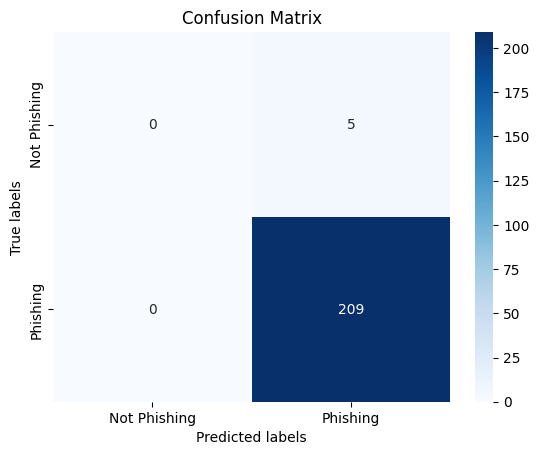

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Phishing', 'Phishing']); ax.yaxis.set_ticklabels(['Not Phishing', 'Phishing']);